In [65]:
"""
This notebook contains analysis of the dancer recognition results obtained with the MediaPipe Pose model.

"""


import numpy as np
import pandas as pd
import time
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [66]:
# Explore the data


data = pd.read_csv('/Users/irinaserenko/Desktop/Semester_Project_eM+/Final_testing/edition4/edition4_sequence_0.mp4.csv')

In [67]:
data.head()

,frame_num,pose_landmarks,pose_world_landmarks
0,[0],[None],[None]
1,[1],[None],[None]
2,[2],[None],[None]
3,[3],[None],[None]
4,[4],[None],[None]


In [68]:
data['pose_landmarks'] = data['pose_landmarks'].apply(lambda x: None if x == '[None]' else x)
data['pose_world_landmarks'] = data['pose_world_landmarks'].apply(lambda x: None if x == '[None]' else x)
data.head()

,frame_num,pose_landmarks,pose_world_landmarks
0,[0],None,None
1,[1],None,None
2,[2],None,None
3,[3],None,None
4,[4],None,None


In [69]:
num_of_nones = data['pose_landmarks'].isna().sum() # == data['pose_world_landmarks'].isna().sum()#
num_of_nones 

845

In [70]:
data[data.pose_landmarks.isna() == False].head()

,frame_num,pose_landmarks,pose_world_landmarks
632,[632],[landmark {\n x: 0.44631988\n y: 0.44470653\...,[landmark {\n x: -0.084629595\n y: -0.597924...
633,[633],[landmark {\n x: 0.44656837\n y: 0.44471234\...,[landmark {\n x: -0.008175362\n y: -0.617830...
634,[634],[landmark {\n x: 0.44688675\n y: 0.44471297\...,[landmark {\n x: -0.0015422024\n y: -0.62380...
635,[635],[landmark {\n x: 0.4472875\n y: 0.44470507\n...,[landmark {\n x: 0.00894054\n y: -0.632717\n...
636,[636],[landmark {\n x: 0.4478193\n y: 0.44467515\n...,[landmark {\n x: 0.014474857\n y: -0.6392211...


In [71]:
string = data.pose_landmarks[632]
string

'[landmark {\n  x: 0.44631988\n  y: 0.44470653\n  z: -0.07299965\n  visibility: 0.9988752\n}\nlandmark {\n  x: 0.44895968\n  y: 0.44204757\n  z: -0.063718915\n  visibility: 0.99920326\n}\nlandmark {\n  x: 0.45009997\n  y: 0.44233653\n  z: -0.06376447\n  visibility: 0.99928963\n}\nlandmark {\n  x: 0.45124206\n  y: 0.44270763\n  z: -0.06380512\n  visibility: 0.99951506\n}\nlandmark {\n  x: 0.44607604\n  y: 0.44234827\n  z: -0.05732884\n  visibility: 0.9985065\n}\nlandmark {\n  x: 0.44507587\n  y: 0.44284478\n  z: -0.05735803\n  visibility: 0.9982653\n}\nlandmark {\n  x: 0.44392315\n  y: 0.44349664\n  z: -0.05740907\n  visibility: 0.9985221\n}\nlandmark {\n  x: 0.45313883\n  y: 0.44793043\n  z: -0.018341824\n  visibility: 0.99949753\n}\nlandmark {\n  x: 0.44327146\n  y: 0.44962794\n  z: 0.009579996\n  visibility: 0.9978617\n}\nlandmark {\n  x: 0.44788584\n  y: 0.44991076\n  z: -0.056999255\n  visibility: 0.9990293\n}\nlandmark {\n  x: 0.4440955\n  y: 0.45066923\n  z: -0.04910743\n  visibi

In [72]:
nums = [float(x) for x in re.findall(r"[-+]?(?:\d*\.*\d+)", string)]
nums

[0.44631988,
 0.44470653,
 -0.07299965,
 0.9988752,
 0.44895968,
 0.44204757,
 -0.063718915,
 0.99920326,
 0.45009997,
 0.44233653,
 -0.06376447,
 0.99928963,
 0.45124206,
 0.44270763,
 -0.06380512,
 0.99951506,
 0.44607604,
 0.44234827,
 -0.05732884,
 0.9985065,
 0.44507587,
 0.44284478,
 -0.05735803,
 0.9982653,
 0.44392315,
 0.44349664,
 -0.05740907,
 0.9985221,
 0.45313883,
 0.44793043,
 -0.018341824,
 0.99949753,
 0.44327146,
 0.44962794,
 0.009579996,
 0.9978617,
 0.44788584,
 0.44991076,
 -0.056999255,
 0.9990293,
 0.4440955,
 0.45066923,
 -0.04910743,
 0.99767584,
 0.46913275,
 0.47988027,
 -0.043102197,
 0.99687046,
 0.43005875,
 0.47577214,
 0.027707208,
 0.9904144,
 0.4788267,
 0.4841836,
 -0.18137035,
 0.9738032,
 0.41237754,
 0.46543765,
 -0.07501734,
 0.7866604,
 0.44592243,
 0.47681558,
 -0.27321178,
 0.9116577,
 0.40810898,
 0.46638876,
 -0.21360007,
 0.6676934,
 0.43909633,
 0.47626773,
 -0.29855806,
 0.8358046,
 0.40895194,
 0.455391,
 -0.23870668,
 0.602434,
 0.43610

In [73]:
# First option (slow)

start_time = time.time()

data.pose_landmarks = data.pose_landmarks.apply(lambda row: [float(x) for x in re.findall(r"[-+]?(?:\d*\.*\d+)", row)] if (isinstance(row, str) == True) else row)
data.pose_world_landmarks = data.pose_world_landmarks.apply(lambda row: [float(x) for x in re.findall(r"[-+]?(?:\d*\.*\d+)", row)] if (isinstance(row, str) == True) else row)

print("--- %s seconds ---" % (time.time() - start_time))

data[data.pose_landmarks.isna() == False].head()

--- 1.7075040340423584 seconds ---


,frame_num,pose_landmarks,pose_world_landmarks
632,[632],"[0.44631988, 0.44470653, -0.07299965, 0.998875...","[-0.084629595, -0.5979242, -0.11776433, 0.9988..."
633,[633],"[0.44656837, 0.44471234, -0.072728716, 0.99897...","[-0.008175362, -0.6178306, -0.13286202, 0.9989..."
634,[634],"[0.44688675, 0.44471297, -0.07237101, 0.999021...","[-0.0015422024, -0.6238011, -0.14113341, 0.999..."
635,[635],"[0.4472875, 0.44470507, -0.07170378, 0.999113,...","[0.00894054, -0.632717, -0.14138292, 0.999113,..."
636,[636],"[0.4478193, 0.44467515, -0.06737622, 0.9991495...","[0.014474857, -0.63922113, -0.14043267, 0.9991..."


In [74]:
# Second option (much faster)

start_time = time.time()

data.pose_landmarks = data.pose_landmarks.apply(lambda row : row.replace('[landmark {\n  x:', '') if (isinstance(row, str) == True) else row)
data.pose_landmarks = data.pose_landmarks.apply(lambda row : row.replace('\n  y:', '') if (isinstance(row, str) == True) else row)
data.pose_landmarks = data.pose_landmarks.apply(lambda row : row.replace('\n  z:', '') if (isinstance(row, str) == True) else row)
data.pose_landmarks = data.pose_landmarks.apply(lambda row : row.replace('\n  visibility:', '') if (isinstance(row, str) == True) else row)
data.pose_landmarks = data.pose_landmarks.apply(lambda row : row.replace('\n}\nlandmark {\n  x:', '') if (isinstance(row, str) == True) else row)
data.pose_landmarks = data.pose_landmarks.apply(lambda row : row.replace('\n}\n]', '') if (isinstance(row, str) == True) else row)
data.pose_landmarks = data.pose_landmarks.apply(lambda row : [float(x) for x in row.split()] if (isinstance(row, str) == True) else row)

data.pose_world_landmarks = data.pose_world_landmarks.apply(lambda row : row.replace('[landmark {\n  x:', '') if (isinstance(row, str) == True) else row)
data.pose_world_landmarks = data.pose_world_landmarks.apply(lambda row : row.replace('\n  y:', '') if (isinstance(row, str) == True) else row)
data.pose_world_landmarks = data.pose_world_landmarks.apply(lambda row : row.replace('\n  z:', '') if (isinstance(row, str) == True) else row)
data.pose_world_landmarks = data.pose_world_landmarks.apply(lambda row : row.replace('\n  visibility:', '') if (isinstance(row, str) == True) else row)
data.pose_world_landmarks = data.pose_world_landmarks.apply(lambda row : row.replace('\n}\nlandmark {\n  x:', '') if (isinstance(row, str) == True) else row)
data.pose_world_landmarks = data.pose_world_landmarks.apply(lambda row : row.replace('\n}\n]', '') if (isinstance(row, str) == True) else row)
data.pose_world_landmarks = data.pose_world_landmarks.apply(lambda row : [float(x) for x in row.split()] if (isinstance(row, str) == True) else row)

print("--- %s seconds ---" % (time.time() - start_time))

data.iloc[633]
#nums =  [float(x) for x in string.split()]
#nums

--- 0.022981882095336914 seconds ---


frame_num                                                           [633]
pose_landmarks          [0.44656837, 0.44471234, -0.072728716, 0.99897...
pose_world_landmarks    [-0.008175362, -0.6178306, -0.13286202, 0.9989...
Name: 633, dtype: object

In [75]:
data[data.pose_landmarks.isna() == False].head()

,frame_num,pose_landmarks,pose_world_landmarks
632,[632],"[0.44631988, 0.44470653, -0.07299965, 0.998875...","[-0.084629595, -0.5979242, -0.11776433, 0.9988..."
633,[633],"[0.44656837, 0.44471234, -0.072728716, 0.99897...","[-0.008175362, -0.6178306, -0.13286202, 0.9989..."
634,[634],"[0.44688675, 0.44471297, -0.07237101, 0.999021...","[-0.0015422024, -0.6238011, -0.14113341, 0.999..."
635,[635],"[0.4472875, 0.44470507, -0.07170378, 0.999113,...","[0.00894054, -0.632717, -0.14138292, 0.999113,..."
636,[636],"[0.4478193, 0.44467515, -0.06737622, 0.9991495...","[0.014474857, -0.63922113, -0.14043267, 0.9991..."


In [76]:
# Now we can save these values in any other structure that we need

In [77]:
# All data processing


DATA_PATH = '/Users/irinaserenko/Desktop/Semester_Project_eM+/Final_testing/Landmarks/'


In [78]:
# Save a list of folder names (editions)
editions = [os.path.basename(f.path) for f in os.scandir(DATA_PATH) if f.is_dir()]
all_files =[]
file_names=[]

In [79]:
start_time = time.time()


for edition in editions:
    all_files.append(glob.glob(DATA_PATH + edition + "/*.csv"))

all_files = [item for sublist in all_files for item in sublist]
file_names = [os.path.basename(file) for file in all_files]

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file, sep = ',') for file in all_files)  

# Concatenate all DataFrames
data = pd.concat(df_list, keys=file_names)
        
data['pose_landmarks'] = data['pose_landmarks'].apply(lambda x: None if x == '[None]' else x)
data['pose_world_landmarks'] = data['pose_world_landmarks'].apply(lambda x: None if x == '[None]' else x)

data.pose_landmarks = data.pose_landmarks.apply(lambda row : row.replace('[landmark {\n  x:', '') if (isinstance(row, str) == True) else row)
data.pose_landmarks = data.pose_landmarks.apply(lambda row : row.replace('\n  y:', '') if (isinstance(row, str) == True) else row)
data.pose_landmarks = data.pose_landmarks.apply(lambda row : row.replace('\n  z:', '') if (isinstance(row, str) == True) else row)
data.pose_landmarks = data.pose_landmarks.apply(lambda row : row.replace('\n  visibility:', '') if (isinstance(row, str) == True) else row)
data.pose_landmarks = data.pose_landmarks.apply(lambda row : row.replace('\n}\nlandmark {\n  x:', '') if (isinstance(row, str) == True) else row)
data.pose_landmarks = data.pose_landmarks.apply(lambda row : row.replace('\n}\n]', '') if (isinstance(row, str) == True) else row)
data.pose_landmarks = data.pose_landmarks.apply(lambda row : [float(x) for x in row.split()] if (isinstance(row, str) == True) else row)

data.pose_world_landmarks = data.pose_world_landmarks.apply(lambda row : row.replace('[landmark {\n  x:', '') if (isinstance(row, str) == True) else row)
data.pose_world_landmarks = data.pose_world_landmarks.apply(lambda row : row.replace('\n  y:', '') if (isinstance(row, str) == True) else row)
data.pose_world_landmarks = data.pose_world_landmarks.apply(lambda row : row.replace('\n  z:', '') if (isinstance(row, str) == True) else row)
data.pose_world_landmarks = data.pose_world_landmarks.apply(lambda row : row.replace('\n  visibility:', '') if (isinstance(row, str) == True) else row)
data.pose_world_landmarks = data.pose_world_landmarks.apply(lambda row : row.replace('\n}\nlandmark {\n  x:', '') if (isinstance(row, str) == True) else row)
data.pose_world_landmarks = data.pose_world_landmarks.apply(lambda row : row.replace('\n}\n]', '') if (isinstance(row, str) == True) else row)
data.pose_world_landmarks = data.pose_world_landmarks.apply(lambda row : [float(x) for x in row.split()] if (isinstance(row, str) == True) else row)

print("--- %s seconds ---" % (time.time() - start_time))


--- 25.400710105895996 seconds ---


In [80]:
data

frame_num  \
edition11_sequence_0.mp4.csv 0          [0]   
                             1          [1]   
                             2          [2]   
                             3          [3]   
                             4          [4]   
...                                     ...   
edition37_sequence_0.mp4.csv 2472    [2472]   
                             2473    [2473]   
                             2474    [2474]   
                             2475    [2475]   
                             2476    [2476]   

                                                                      pose_landmarks  \
edition11_sequence_0.mp4.csv 0                                                  None   
                             1     [0.24043067, 0.54295695, 0.14115395, 0.9996261...   
                             2     [0.23813498, 0.54276305, 0.06426247, 0.9996320...   
                             3     [0.23401447, 0.5381483, 0.13095072, 0.999432, ...   
                             4     [0.23084566, 0.5361415, 0.19824085, 0.9993972,...   
...                                                                              ...   
edition37_sequence_0.mp4.csv 2472  [0.20270516, 0.654944, 0.04174688, 0.99869615,...   
                             2473  [0.20029356, 0.65428334, 0.03220629, 0.9986716...   
                             2474  [0.1980031, 0.6537832, 0.03291351, 0.9987947, ...   
                             2475  [0.19507195, 0.6534664, 0.029732352, 0.9989139...   
                             2476  [0.19228478, 0.6540487, 0.026435457, 0.9990208...   

                                                                pose_world_landmarks  
edition11_sequence_0.mp4.csv 0                                                  None  
                             1     [-0.27563232, -0.5276799, 0.1923874, 0.9996261...  
                             2     [-0.27538112, -0.53507084, 0.106582046, 0.9996...  
                             3     [-0.24918903, -0.5912168, 0.15597583, 0.999432...  
                             4     [-0.1787443, -0.588457, 0.23556855, 0.9993972,...  
...                                                                              ...  
edition37_sequence_0.mp4.csv 2472  [-0.0452208, -0.68700296, 0.16123687, 0.998696...  
                             2473  [-0.027015371, -0.6815993, 0.13410053, 0.99867...  
                             2474  [-0.038548883, -0.69402546, 0.13466191, 0.9987...  
                             2475  [-0.09488414, -0.6929947, 0.109547146, 0.99891...  
                             2476  [-0.12177604, -0.6921613, 0.09392752, 0.999020...  

[126431 rows x 3 columns]

In [81]:
sums_of_nans = [data['pose_landmarks'].loc[key].isna().sum() for key in file_names]

In [82]:
percentage_of_nans= [data['pose_landmarks'].loc[key].isna().sum()/data.loc[key].shape[0] * 100 for key in file_names]


In [ ]:
# absolute number of lost frames in a video
plt.title("Absolute number of lost frames in each video from the testing set.", size=18)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=file_names, y=sums_of_nans, palette="deep")
plt.xticks(rotation=90)
# default_x_ticks = range(len(sums_of_nans))
# plt.plot(default_x_ticks, sums_of_nans)
# plt.xticks(default_x_ticks, file_names)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'edition11_sequence_0.mp4.csv'),
  Text(1, 0, 'edition16_sequence_0.mp4.csv'),
  Text(2, 0, 'edition29_sequence_0.mp4.csv'),
  Text(3, 0, 'edition20_sequence_0.mp4.csv'),
  Text(4, 0, 'edition27_sequence_0.mp4.csv'),
  Text(5, 0, 'edition18_sequence_0.mp4.csv'),
  Text(6, 0, 'edition9_sequence_1.mp4.csv'),
  Text(7, 0, 'edition42_sequence_0.mp4.csv'),
  Text(8, 0, 'edition7_sequence_0.mp4.csv'),
  Text(9, 0, 'edition45_sequence_0.mp4.csv'),
  Text(10, 0, 'edition26_sequence_6.mp4.csv'),
  Text(11, 0, 'edition19_sequence_8.mp4.csv'),
  Text(12, 0, 'edition21_sequence_0.mp4.csv'),
  Text(13, 0, 'edition28_sequence_7.mp4.csv'),
  Text(14, 0, 'edition10_sequence_0.mp4.csv'),
  Text(15, 0, 'edition6_sequence_2.mp4.csv'),
  Text(16, 0, 'edition44_sequence_0.mp4.csv'),
  Text(17, 0, 'edition35

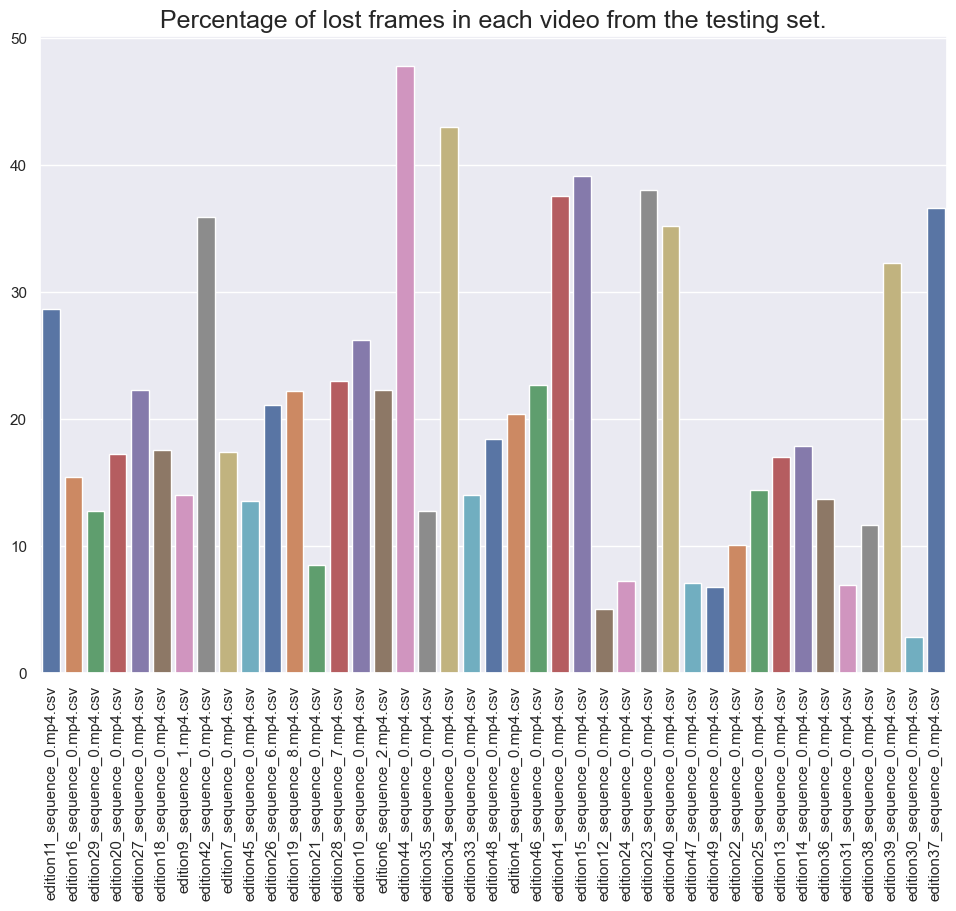

In [84]:
plt.title("Percentage of lost frames in each video from the testing set.", size=18)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=file_names, y=percentage_of_nans, palette="deep")
plt.xticks(rotation=90)

In [ ]:
# get the list of tuples from two lists.
# and merge them by using zip().
list_of_tuples = list(zip(file_names, percentage_of_nans))
 
# Converting lists of tuples into pandas Dataframe.
df = pd.DataFrame(list_of_tuples, columns=['file_names', 'percentage_of_nans'])

# mean visibility score for each landmark/edition?
visibilities = data.pose_landmarks.apply(lambda x: x[3::4] if (isinstance(x, list) == True) else x)
for i in range(33):
    mean_visibilities_for_landmark = [visibilities.loc[key].apply(lambda x: x[i] if (isinstance(x, list) == True) else x) for key in file_names]
    mean_visibilities_for_landmark = [key.mean() for key in mean_visibilities_for_landmark]
    df['visibility'+str(i)] = mean_visibilities_for_landmark

df['num_of_landmarks'] = 0
for i in range(33):
    n = [visibilities.loc[key].apply(lambda x: x[i] if (isinstance(x, list) == True) else x) for key in file_names]
    num_of_landmarks = [len(key) for key in n]
    df['num_of_landmarks'] = df['num_of_landmarks'] + num_of_landmarks

df['num_of_not_visible_landmarks'] = 0
for i in range(33):
    n = [visibilities.loc[key].apply(lambda x: x[i] if (isinstance(x, list) == True) else x) for key in file_names]
    n = [key[key<0.5] for key in n]
    num_of_not_visible = [len(key) for key in n]
    df['num_of_not_visible_landmarks'] = df['num_of_not_visible_landmarks'] + num_of_not_visible
    
# df = df.sort_values('percentage_of_nans')
df['full_file_names'] = df.loc[:, 'file_names']
#df

In [206]:
df.file_names = df.file_names.apply(lambda row : row.replace('edition', '') if (isinstance(row, str) == True) else row)
df.file_names = df.file_names.apply(lambda row : row.replace('_sequence_', ' ') if (isinstance(row, str) == True) else row)
df.file_names = df.file_names.apply(lambda row : row.replace('.mp4.csv', '') if (isinstance(row, str) == True) else row)
df.file_names = df.file_names.apply(lambda row : [int(x) for x in row.split()] if (isinstance(row, str) == True) else row)

In [ ]:
df = df.sort_values('file_names')
#df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'edition4_sequence_0.mp4.csv'),
  Text(1, 0, 'edition6_sequence_2.mp4.csv'),
  Text(2, 0, 'edition7_sequence_0.mp4.csv'),
  Text(3, 0, 'edition9_sequence_1.mp4.csv'),
  Text(4, 0, 'edition10_sequence_0.mp4.csv'),
  Text(5, 0, 'edition11_sequence_0.mp4.csv'),
  Text(6, 0, 'edition12_sequence_0.mp4.csv'),
  Text(7, 0, 'edition13_sequence_0.mp4.csv'),
  Text(8, 0, 'edition14_sequence_0.mp4.csv'),
  Text(9, 0, 'edition15_sequence_0.mp4.csv'),
  Text(10, 0, 'edition16_sequence_0.mp4.csv'),
  Text(11, 0, 'edition18_sequence_0.mp4.csv'),
  Text(12, 0, 'edition19_sequence_8.mp4.csv'),
  Text(13, 0, 'edition20_sequence_0.mp4.csv'),
  Text(14, 0, 'edition21_sequence_0.mp4.csv'),
  Text(15, 0, 'edition22_sequence_0.mp4.csv'),
  Text(16, 0, 'edition23_sequence_0.mp4.csv'),
  Text(17, 0, 'edition24_

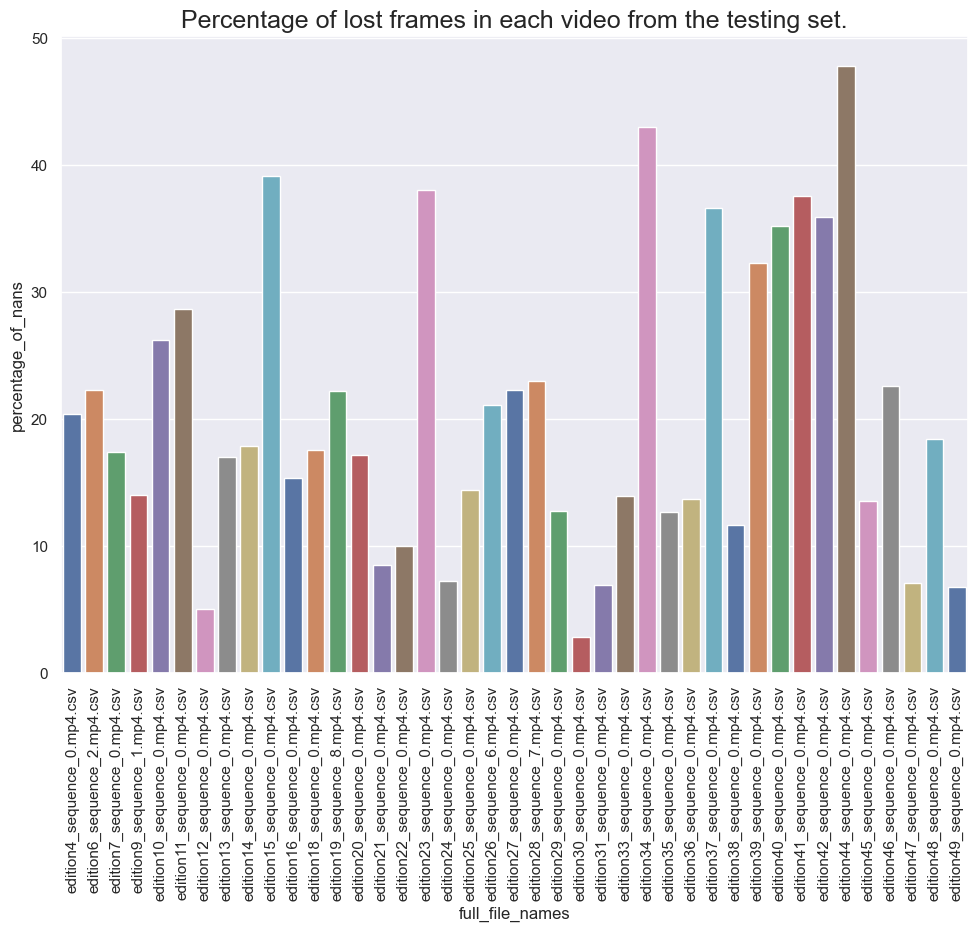

In [208]:
plt.title("Percentage of lost frames in each video from the testing set.", size=18)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=df.full_file_names, y=df.percentage_of_nans, palette="deep")
plt.xticks(rotation=90)

In [209]:
df['edition'] = df.file_names.map(lambda x: x[0])
df['sequence'] = df.file_names.map(lambda x: x[1])
df = df.drop(['file_names'], axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, '4'),
  Text(1, 0, '6'),
  Text(2, 0, '7'),
  Text(3, 0, '9'),
  Text(4, 0, '10'),
  Text(5, 0, '11'),
  Text(6, 0, '12'),
  Text(7, 0, '13'),
  Text(8, 0, '14'),
  Text(9, 0, '15'),
  Text(10, 0, '16'),
  Text(11, 0, '18'),
  Text(12, 0, '19'),
  Text(13, 0, '20'),
  Text(14, 0, '21'),
  Text(15, 0, '22'),
  Text(16, 0, '23'),
  Text(17, 0, '24'),
  Text(18, 0, '25'),
  Text(19, 0, '26'),
  Text(20, 0, '27'),
  Text(21, 0, '28'),
  Text(22, 0, '29'),
  Text(23, 0, '30'),
  Text(24, 0, '31'),
  Text(25, 0, '33'),
  Text(26, 0, '34'),
  Text(27, 0, '35'),
  Text(28, 0, '36'),
  Text(29, 0, '37'),
  Text(30, 0, '38'),
  Text(31, 0, '39'),
  Text(32, 0, '40'),
  Text(33, 0, '41'),
  Text(34, 0, '42'),
  Text(35, 0, '44'),
  Text(36, 0, '45'),
  Text(37, 0, '46'),
  Text(38, 0, '47'),
  Tex

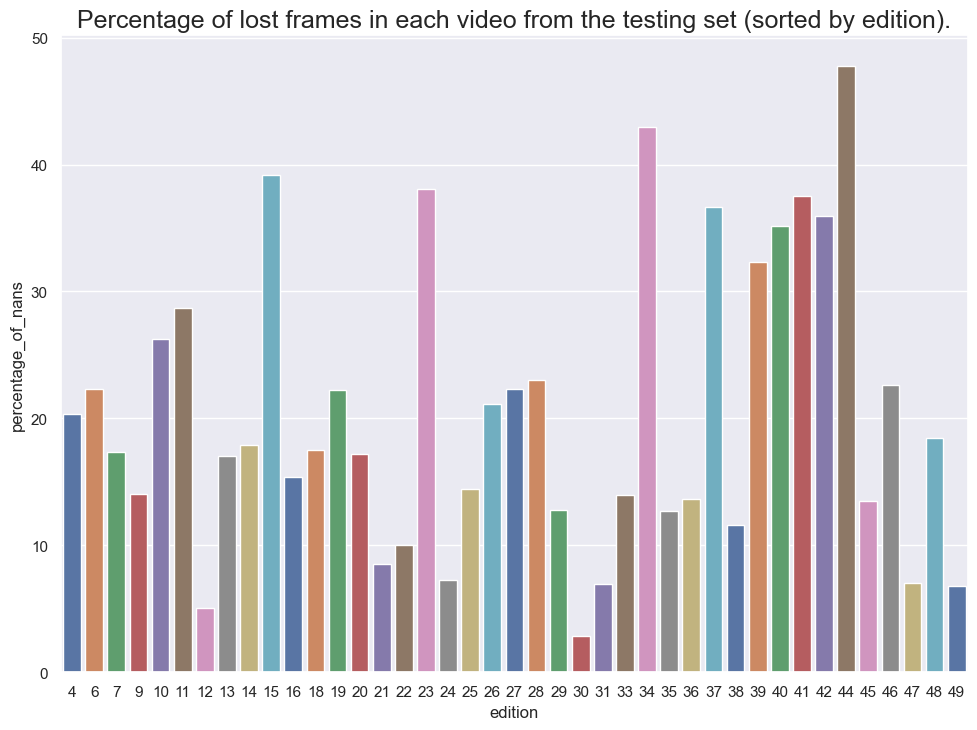

In [210]:
plt.title("Percentage of lost frames in each video from the testing set (sorted by edition).", size=18)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=df.edition, y=df.percentage_of_nans, palette="deep")
plt.xticks()

In [ ]:
#df.iloc[:,1:34].mean(axis=0)

Text(0, 0.5, 'Score')

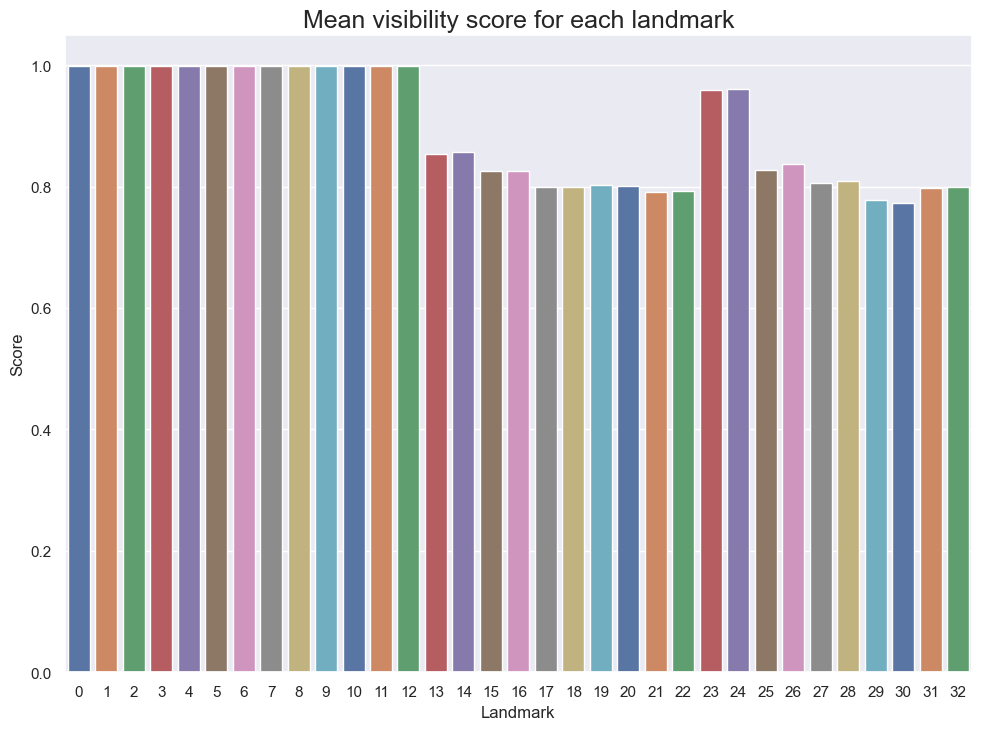

In [212]:
plt.title("Mean visibility score for each landmark", size=18)
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(x=df.iloc[:,1:34].columns, y=df.iloc[:,1:34].mean(axis=0), palette="deep")
g.set_xticks(range(33))
g.set_xticklabels(range(33))
plt.xlabel("Landmark")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

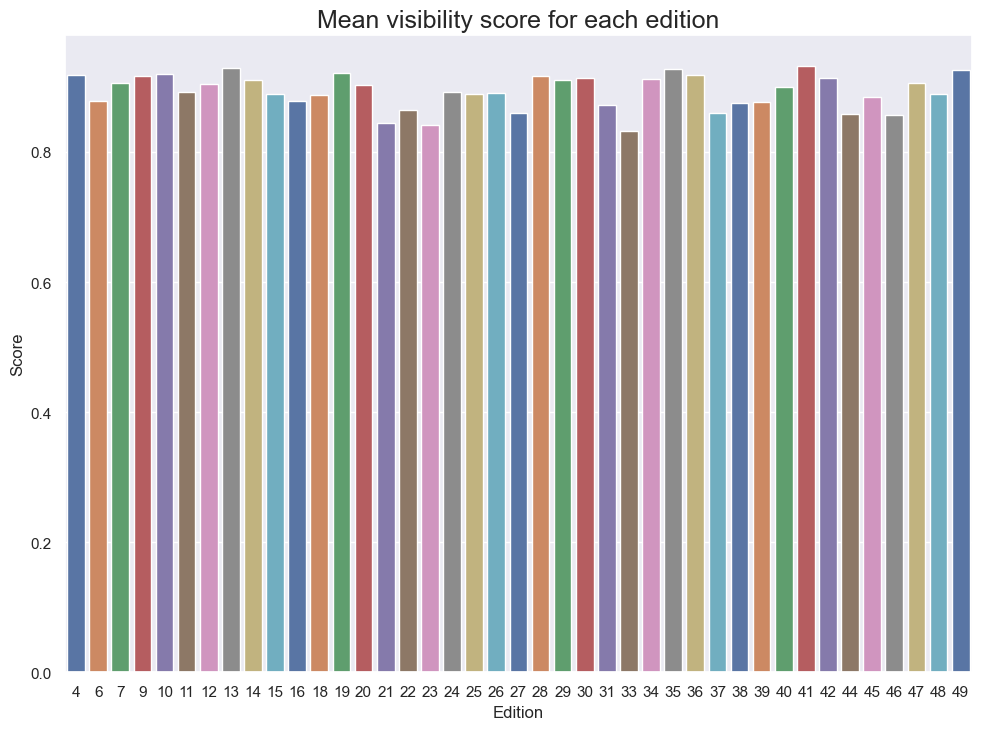

In [213]:
plt.title("Mean visibility score for each edition", size=18)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=df.edition, y=df.iloc[:,1:34].mean(axis=1), palette="deep")
plt.xlabel("Edition")
plt.ylabel("Score")

In [214]:
df

,percentage_of_nans,visibility0,visibility1,visibility2,visibility3,visibility4,visibility5,visibility6,visibility7,visibility8,...,visibility28,visibility29,visibility30,visibility31,visibility32,num_of_landmarks,num_of_not_visible_landmarks,full_file_names,edition,sequence
21,20.366353,0.999545,0.999542,0.999494,0.999552,0.999442,0.999337,0.999370,0.999522,0.999177,...,0.828803,0.792113,0.783324,0.833622,0.824607,136917,2299,edition4_sequence_0.mp4.csv,4,0
15,22.293623,0.999477,0.999537,0.999461,0.999521,0.999533,0.999463,0.999509,0.999398,0.999397,...,0.837902,0.778722,0.787538,0.791461,0.823991,66759,3284,edition6_sequence_2.mp4.csv,6,2
8,17.382979,0.999638,0.999664,0.999591,0.999651,0.999629,0.999520,0.999583,0.999507,0.999456,...,0.796554,0.748079,0.754860,0.773047,0.784758,155100,6526,edition7_sequence_0.mp4.csv,7,0
6,14.035088,0.998902,0.999309,0.999280,0.999331,0.999108,0.999037,0.999178,0.999347,0.999017,...,0.838345,0.785590,0.807011,0.832201,0.846238,114741,2982,edition9_sequence_1.mp4.csv,9,1
14,26.238614,0.999742,0.999686,0.999616,0.999668,0.999721,0.999671,0.999709,0.999478,0.999628,...,0.897857,0.832564,0.843181,0.874888,0.890395,148533,3505,edition10_sequence_0.mp4.csv,10,0
0,28.657617,0.998473,0.999141,0.999029,0.999100,0.999285,0.999176,0.999256,0.999116,0.999362,...,0.770940,0.796353,0.758590,0.806175,0.775713,43758,1880,edition11_sequence_0.mp4.csv,11,0
25,5.048276,0.999072,0.999159,0.999098,0.999136,0.999107,0.999031,0.999047,0.999010,0.998966,...,0.897788,0.861078,0.860112,0.858118,0.879107,119625,4677,edition12_sequence_0.mp4.csv,12,0
33,17.020548,0.999248,0.999290,0.999166,0.999280,0.999206,0.999018,0.999109,0.998941,0.998726,...,0.875056,0.845743,0.826740,0.888835,0.870787,96360,1284,edition13_sequence_0.mp4.csv,13,0
34,17.879605,0.999640,0.999648,0.999601,0.999641,0.999644,0.999587,0.999632,0.999574,0.999602,...,0.838861,0.759957,0.799809,0.798418,0.831505,146916,5998,edition14_sequence_0.mp4.csv,14,0
24,39.153187,0.999231,0.999273,0.999120,0.999235,0.999183,0.999013,0.999088,0.998940,0.998816,...,0.828983,0.763358,0.786746,0.768242,0.810357,69366,1592,edition15_sequence_0.mp4.csv,15,0


Text(0, 0.5, 'Percentage of not visible landmarks')

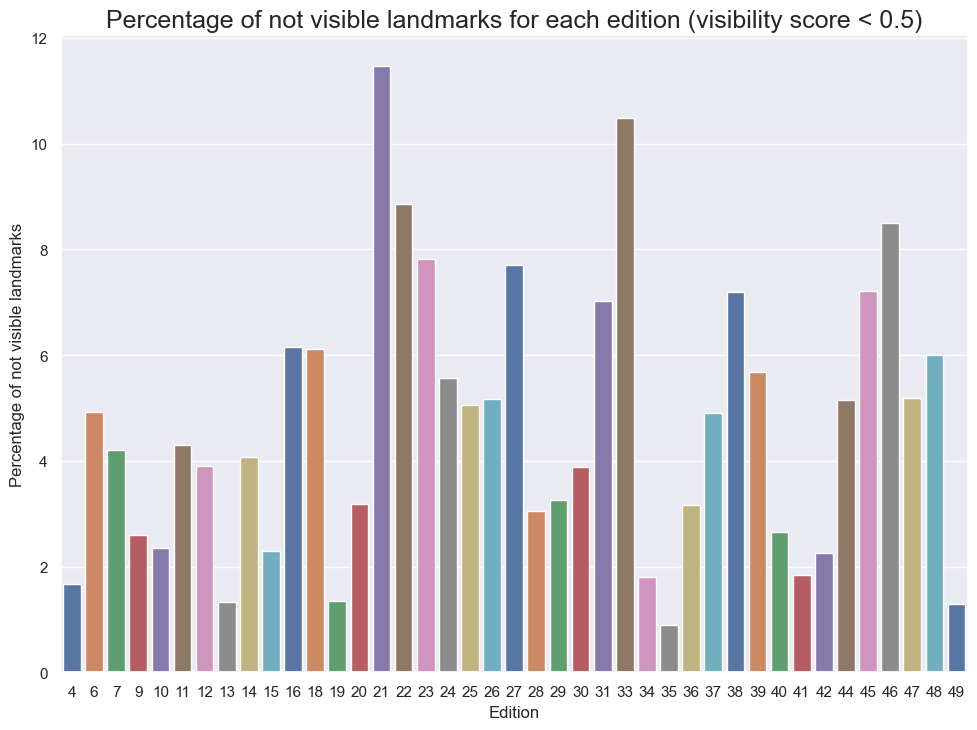

In [218]:
plt.title("Percentage of not visible landmarks for each edition (visibility score < 0.5)", size=18)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=df.edition, y=df.num_of_not_visible_landmarks/df.num_of_landmarks * 100, palette="deep")
plt.xlabel("Edition")
plt.ylabel("Percentage of not visible landmarks")